# Motion Profile Velocity 2018-09-25

Plot of motion profile velocity, setpoint velocity with distance error P, actual velocity from wheel zero. The motion profile was generated from the **jif** [v18.0.0](https://github.com/strykeforce/protobots/releases/tag/v18.0.0) code.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
trace_df = pd.read_pickle("data/trace-2018-09-25.pkl.gz")

In [7]:
vel_df = trace_df.pivot(index='millis', columns='measure', values='value')

vel_df['actual_vel'] = vel_df['actual_vel'].abs()
vel_df['setpoint_vel'] = vel_df['setpoint_vel'] / 10.0
vel_df['profile_vel'] = vel_df['profile_vel'] / 10.0
vel_df['ticks_error'] = vel_df['actual_ticks'] - vel_df['profile_ticks']

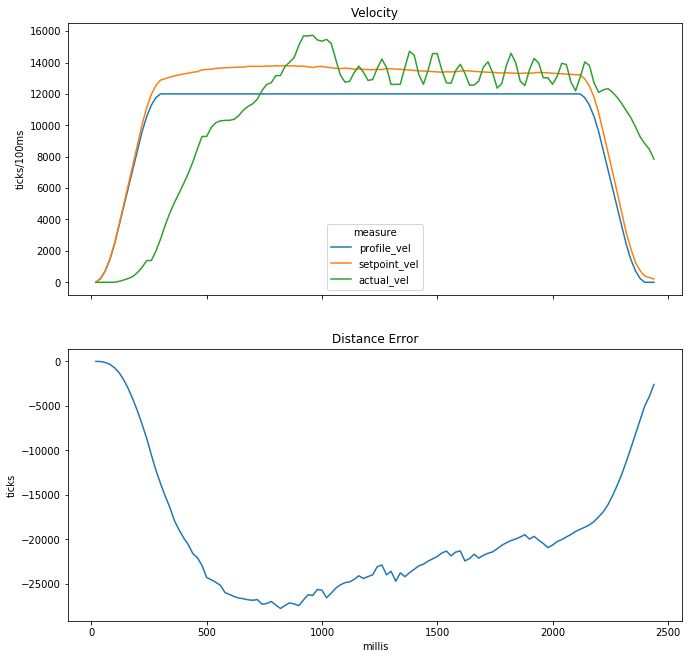

In [8]:
grid=False
fig, (vel_ax, ticks_ax) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(11, 11))
vel_ax.set(title='Velocity', ylabel='ticks/100ms')
ticks_ax.set(title='Distance Error', ylabel='ticks')
vel_df[['profile_vel', 'setpoint_vel', 'actual_vel']].plot(ax=vel_ax, grid=grid)
vel_df[['ticks_error']].plot(ax=ticks_ax, grid=grid, legend=False)